In [8]:
%matplotlib inline

In [9]:
# Falling through the earth

dia = 12742000 # diameter of the earth in meters
rad = dia/2.0
me = 5.972e24  # mass of the earth
pi = 3.1415926
G = 6.67384e-11 # gravitational constant

volume = 4 * pi * pow(rad, 3.0) / 3.0
density = me / volume

def acc_at_depth(d):
    if d > rad:
        return g
    if d < -rad:
        return -g
    vol_d = 4 * pi * pow(d, 3.0) / 3.0
    md = density * vol_d
    acc = G*md / pow(d, 2.0)
    return acc

g = acc_at_depth(rad)


Lets plot the acceleration due to gravity vs distance from center of the earth. From our analytical work ($a_h = \frac {h}{R} g$), its expected to be a linear relationship.

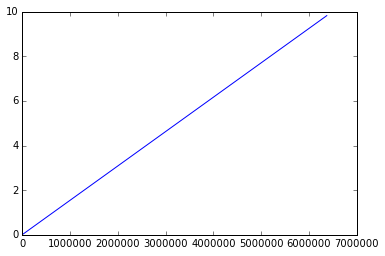

In [11]:
import matplotlib.pyplot as plt

acc_depth = []
for d in xrange(500, 1, -1):
    dd = d*rad / 500
    acc_depth.append((dd, acc_at_depth(dd)))

xvals = [a for a,b in acc_depth]
yvals = [b for a,b in acc_depth]
plt.plot(xvals, yvals)


In [58]:
import math
from pprint import pprint as pp
chord_lengths = [100000*n for n in range(1, 127)]
g = 9.8

def get_acc(chlen, R, x):
    return (g/(2*R))*(chlen - 2*x)

def get_vt(s, v, a):
    rv = rt = 0
    if a == 0:
        rv = v
        rt = s/v
        return (rv, rt)
    rt = (math.sqrt(v*v + 2*a*s) - v) / a
    rv = v + a*rt
    return (rv, rt)
        
def get_travel_time(chlen, nparts):
    dist = chlen/2.0
    curve_power = 2.0
    stfacs = [pow((float(x)/nparts), curve_power) for x in xrange(nparts+1)]
    steps = [dist*xx for xx in stfacs]
    total_time = 0
    cv = 0
    for st1, st2 in zip(steps, steps[1:]):
        dist = st2 - st1
        acc = get_acc(chlen, rad, st1)
        cv, time_part = get_vt(dist, cv, acc)
        total_time += time_part
        
    return 2*total_time

results = [(dist1, get_travel_time(dist1, 500)) for dist1 in chord_lengths]

pp([(ds, tm, tm/60) for ds, tm in results])

[(100000, 2531.775847302616, 42.196264121710264),
 (200000, 2531.775847302616, 42.196264121710264),
 (300000, 2531.7758473026233, 42.19626412171039),
 (400000, 2531.775847302616, 42.196264121710264),
 (500000, 2531.775847302575, 42.19626412170958),
 (600000, 2531.7758473026233, 42.19626412171039),
 (700000, 2531.7758473026006, 42.19626412171001),
 (800000, 2531.775847302616, 42.196264121710264),
 (900000, 2531.775847302613, 42.196264121710215),
 (1000000, 2531.775847302575, 42.19626412170958),
 (1100000, 2531.775847302617, 42.196264121710286),
 (1200000, 2531.7758473026233, 42.19626412171039),
 (1300000, 2531.775847302659, 42.19626412171098),
 (1400000, 2531.7758473026006, 42.19626412171001),
 (1500000, 2531.7758473026142, 42.196264121710236),
 (1600000, 2531.775847302616, 42.196264121710264),
 (1700000, 2531.7758473026574, 42.19626412171096),
 (1800000, 2531.775847302613, 42.196264121710215),
 (1900000, 2531.7758473026583, 42.196264121710975),
 (2000000, 2531.775847302575, 42.19626412